In [1]:
from queue import Queue
from copy import deepcopy
from itertools import combinations
import networkx as nx
from tqdm.notebook import tqdm
from networkx.classes.function import path_weight
from math import comb

In [2]:
data = open("input/23").read().splitlines()

In [3]:
dirs = {
    ">": (0, 1),
    "<": (0, -1),
    "v": (1, 0),
    "^": (-1, 0)
}

In [4]:
start = (0, data[0].index("."))
end = (len(data) - 1 , data[-1].index("."))

grid = {}
for r, line in enumerate(data):
    for c, char in enumerate(line):
        if char == "#":
            continue
        grid[(r, c)] = char

# Find pure conjunctions

In [5]:
conjunctions = set()
for r, c in grid.keys():
    num_neighbours = 0
    for d in dirs.values():
        if (r + d[0], c + d[1]) in grid:
            num_neighbours += 1
    if num_neighbours > 2:
        conjunctions.add((r, c))
        
conjunctions.add(start)
conjunctions.add(end)

In [6]:
# Just for tqdm
num_comb = comb(len(conjunctions), 2)

In [7]:
def find_path(start, end, part2=False):
    q = Queue()
    q.put((0, start, set(start)))
    result = []
    while q.qsize() > 0:
        length, pos, path = q.get()
        if pos not in grid:
            continue

        if pos == end:
            result.append(length)
            continue

        value = grid[pos]
        valid = None if value == "." else value

        for key, d in dirs.items():
            next_pos = (pos[0] + d[0], pos[1] + d[1])        
            if next_pos not in grid:
                continue

            if next_pos in path:
                continue
            
            if part2:
                if next_pos != end and next_pos in conjunctions:
                    continue
            else:
                if valid and valid != key:
                    continue
                
            new_path = deepcopy(path)
            new_path.add(next_pos)
            q.put((length + 1, next_pos, new_path))
    return result

# Part 1
Could be optimized to use same logic as part 2

In [8]:
result = find_path(start, end, part2=False)
print("Answer #1:", max(result))

Answer #1: 2326


# Part 2

In [9]:
def get_total_path_len(part):
    res = []
    for a, b in tqdm(combinations(conjunctions, 2), total=num_comb):
        path = find_path(a, b, part2=True)
        if path:
            res.append([a, b, path])
            
    g = nx.Graph()
    for n1, n2, w in res:
        g.add_edge(str(n1), str(n2), weight=w[0])
        
    nx.draw(g, with_labels=True)
    
    path_lenghts = []
    for x in tqdm(nx.all_simple_paths(g, str(start), str(end))):
        p_length = path_weight(g, x, weight="weight")
        path_lenghts.append(p_length)
        
    print(f"Answer #{part}:", max(path_lenghts))

  0%|          | 0/630 [00:00<?, ?it/s]

0it [00:00, ?it/s]

Answer #2: 6574


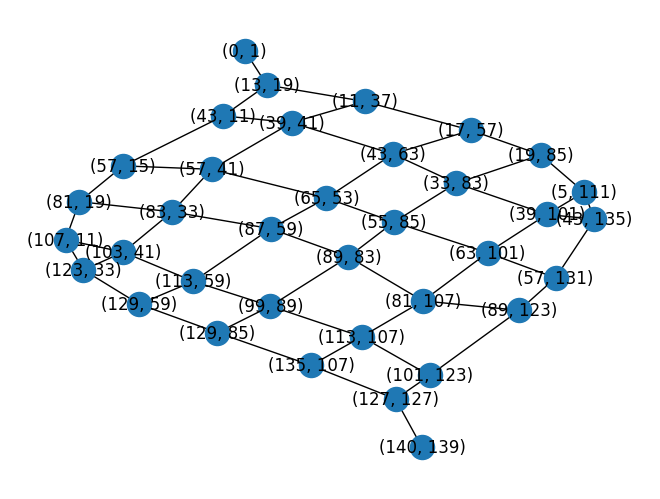

In [10]:
get_total_path_len(2)